In [253]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import *
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import pandas as pd
from sklearn import preprocessing
import numpy as np

df = pd.read_csv("../augmented_data_version_2.0.csv")
empty_data=[]
for x in enumerate(df['tiempo_isquemia']):
    if x[1] == '.':
        new_val = 0
    else:
        new_val = x[1]
    empty_data.append((x[0],new_val))

    

new_df = pd.DataFrame(empty_data, columns=['index', 'tiempo_isquemia'])
new_df.set_index('index', inplace=True)

df.drop('tiempo_isquemia', axis=1, inplace=True)
df = pd.concat([df, new_df], axis=1)
#----------------------------------------------#
df = df.drop(['Unnamed: 0'], axis=1)
df.head()
print(df.shape)

cont_cols = ['edad','peso','frecuencia_cardiaca','presion_arterial_sistolica','presion_arterial_diastolica','hb','creatinina','ckmb','trigliceridos','glicemia','colesterol','escala_grace','tiempo_isquemia']
bin_cols = ['estado_vital','sexo','hipertension_arterial','diabetes_mellitus','tabaquismo','fibrilacion_auricular','insuficiencia_renal_cronica','ieca','furosemida','otros_diureticos','clopidogrel','dialisis','scacest','insuficiencia_cardiaca_congestiva','enfermedad_arterias_coronarias','infarto_miocardio_agudo']

# create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# create an object to transform the data to fit minmax processor
df_scaled = min_max_scaler.fit_transform(df[cont_cols])

# run the normalizer on the dataframe
df_normalized = pd.DataFrame(df_scaled)
df_normalized.columns = cont_cols

df_normalized = pd.concat([df_normalized, df[bin_cols]], axis=1)

df_normalized= df_normalized.dropna()
print(df_normalized.shape)
X = df_normalized.drop('estado_vital', axis=1)
y = df_normalized['estado_vital']
# class wights
# class_weight = {0: 1, 1: len(y) / sum(y)}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1) # 80% training and 20% test


def evaluate(C, X_test, y_test):
    y_pred = C.predict(X_test)
    
    k_fold = KFold(10, shuffle = True, random_state=1) #10-fold cross-validation
    cv_scores = cross_val_score(C, X_test, y_test.values.ravel(), cv = k_fold)

    print("Cross-validation score means: ", cv_scores.mean())
    
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    
    print(classification_report(y_test, y_pred))
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d")
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

(1353, 29)
(1353, 29)


In [273]:
def ploting(model_his):
    import matplotlib.pyplot as plt
    # summarize history for accuracy
    plt.plot(model_his.history['accuracy'])
    plt.plot(model_his.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    
    # summarize history for loss
    plt.plot(model_his.history['loss'])
    plt.plot(model_his.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [255]:
def print_graphics(model):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=20)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean, label='Training score')
    plt.plot(train_sizes, test_mean, label='Cross-validation score')
    
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
    
    plt.xlabel('Training set size')
    plt.ylabel('Score')
    plt.legend(loc='best')
    
    # Mostrar la gráfica
    plt.show()

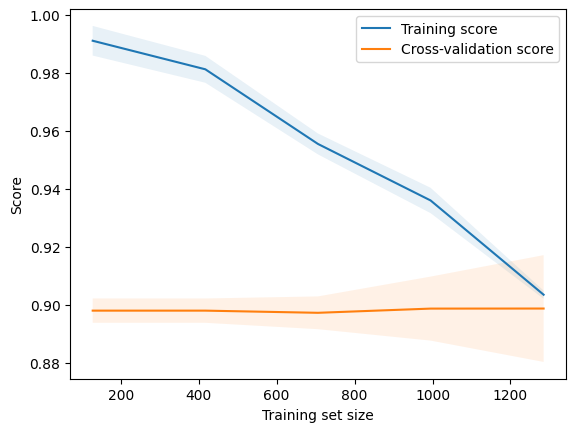

Cross-validation score means:  0.8891534391534393
Accuracy:  0.8708487084870848
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       238
           1       0.25      0.03      0.05        33

    accuracy                           0.87       271
   macro avg       0.57      0.51      0.49       271
weighted avg       0.80      0.87      0.82       271



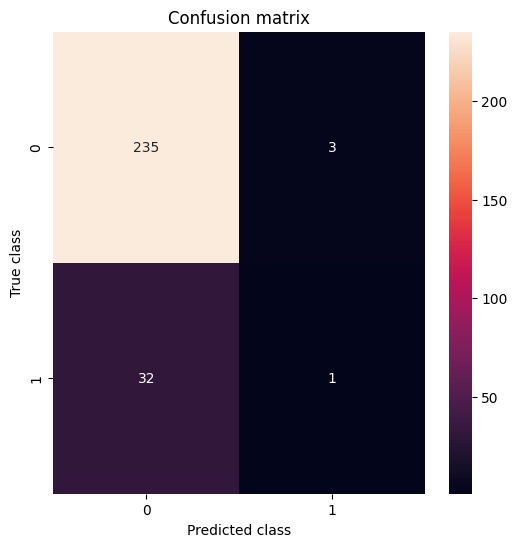

In [256]:

#training KNN
C = KNeighborsClassifier(n_neighbors = 10)
C.fit(X_train, y_train) #train classifier

print_graphics(C)

evaluate(C, X_test, y_test)

Cross-validation score means:  0.8818783068783069
Accuracy:  0.7749077490774908
              precision    recall  f1-score   support

           0       0.91      0.82      0.87       238
           1       0.25      0.42      0.31        33

    accuracy                           0.77       271
   macro avg       0.58      0.62      0.59       271
weighted avg       0.83      0.77      0.80       271



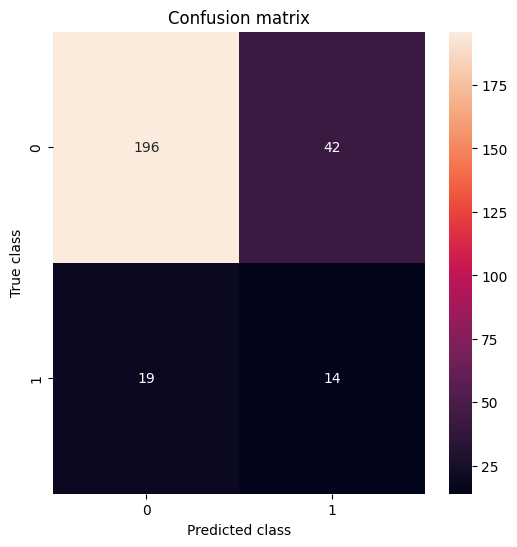

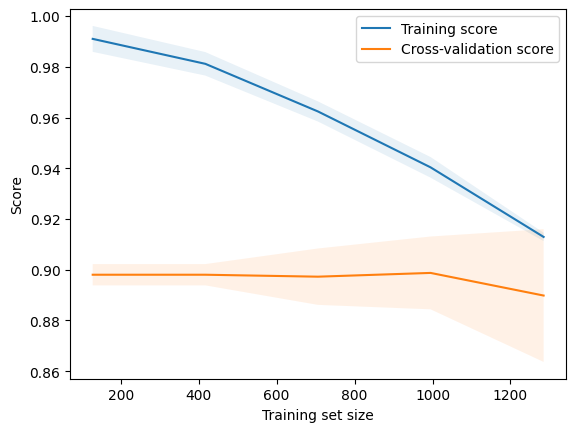

In [257]:
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler(sampling_strategy=0.6)
X_train_res, y_train_res = os.fit_resample(X_train, y_train)

#training KNN
C = KNeighborsClassifier(n_neighbors = 5)
C.fit(X_train_res, y_train_res) #train classifier

evaluate(C, X_test, y_test)
print_graphics(C)

Cross-validation score means:  0.7310846560846562
Accuracy:  0.7343173431734318
              precision    recall  f1-score   support

           0       0.96      0.73      0.83       238
           1       0.28      0.76      0.41        33

    accuracy                           0.73       271
   macro avg       0.62      0.74      0.62       271
weighted avg       0.87      0.73      0.78       271



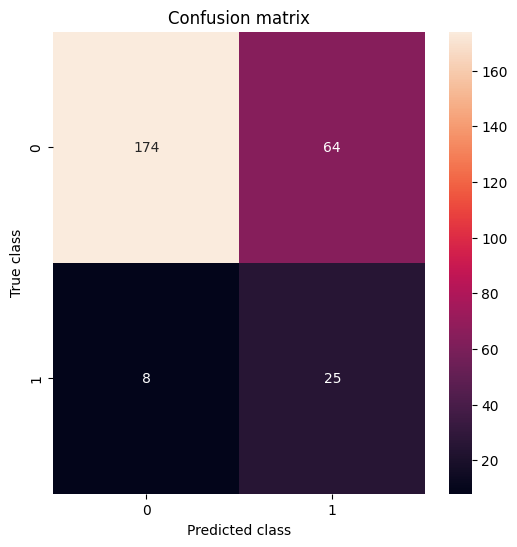

/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py", line 649, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py", line 827, in predict
    predicted_probabilitiy = self.predict

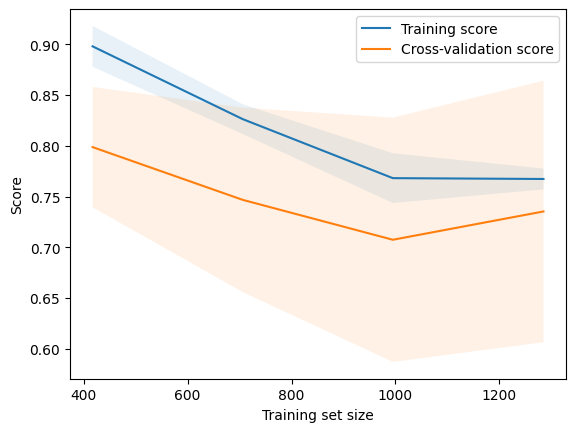

In [258]:
from imblearn.ensemble import BalancedBaggingClassifier
bbc1 = BalancedBaggingClassifier(estimator=C,
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)
 
#Train the classifier.
bbc1.fit(X_train, y_train)
evaluate(bbc1,X_test,y_test)
print_graphics(bbc1)

Cross-validation score means:  0.8272486772486772
Accuracy:  0.8154981549815498
              precision    recall  f1-score   support

           0       0.96      0.82      0.89       238
           1       0.37      0.76      0.50        33

    accuracy                           0.82       271
   macro avg       0.67      0.79      0.69       271
weighted avg       0.89      0.82      0.84       271



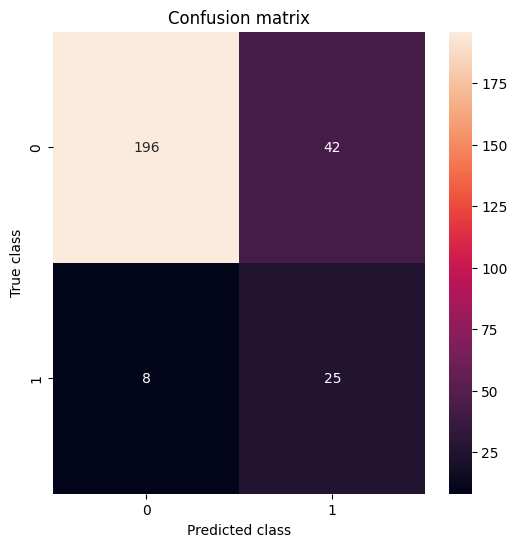

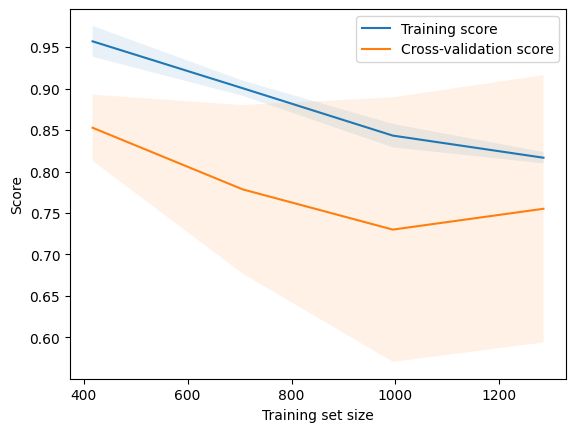

In [259]:
from sklearn import svm

# create a svm classifier
clf = svm.SVC(kernel='rbf',C=1.0,random_state=1,class_weight='balanced') # rbf kernel
# train the model using the training sets
clf.fit(X_train_res, y_train_res)
evaluate(clf,X_test,y_test)
print_graphics(clf)

Cross-validation score means:  0.7716931216931217
Accuracy:  0.8081180811808119
              precision    recall  f1-score   support

           0       0.96      0.82      0.88       238
           1       0.36      0.76      0.49        33

    accuracy                           0.81       271
   macro avg       0.66      0.79      0.69       271
weighted avg       0.89      0.81      0.83       271



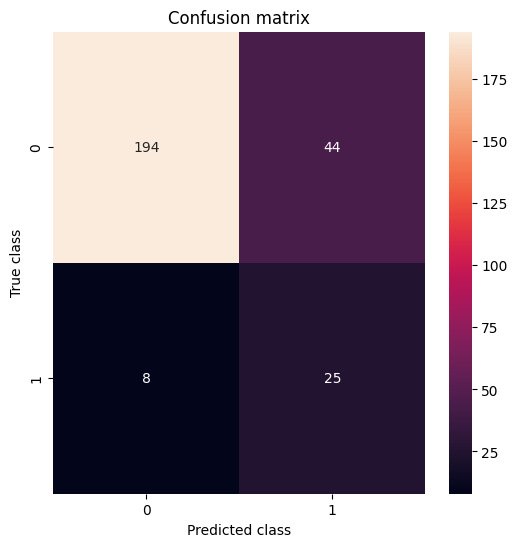

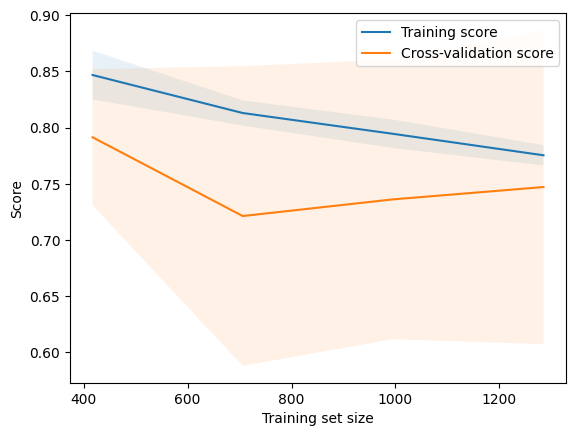

In [260]:
bbc2 = BalancedBaggingClassifier(estimator=clf,
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=7)
 
#Train the classifier.
bbc2.fit(X_train_res, y_train_res)
evaluate(bbc2,X_test,y_test)
print_graphics(bbc2)

Cross-validation score means:  0.8894179894179894
Accuracy:  0.7380073800738007
              precision    recall  f1-score   support

           0       0.97      0.72      0.83       236
           1       0.31      0.86      0.46        35

    accuracy                           0.74       271
   macro avg       0.64      0.79      0.64       271
weighted avg       0.89      0.74      0.78       271



/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


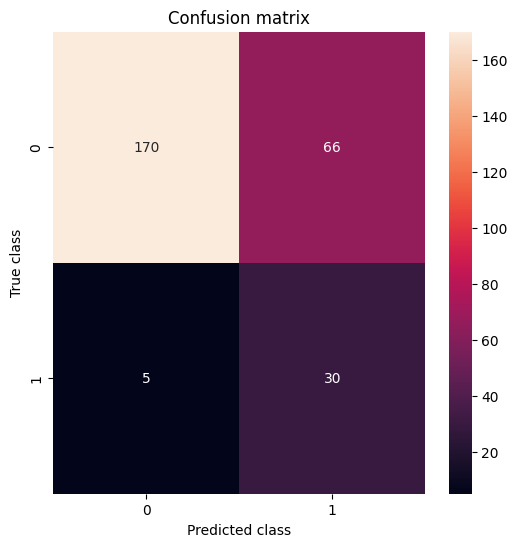

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Cross-validation score means:  0.8894179894179894
Accuracy:  0.7380073800738007
              precision    recall  f1-score   support

           0       0.97      0.72      0.83       236
           1       0.31      0.86      0.46        35

    accuracy                           0.74       271
   macro avg       0.64      0.79      0.64       271
weighted avg       0.89      0.74      0.78       271



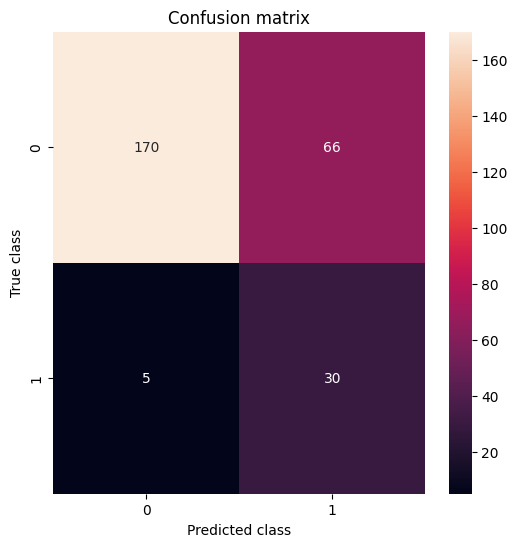

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[learning_curve] Training set sizes: [ 132  430  728 1026 1325]
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END ....................................

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   10.2s finished


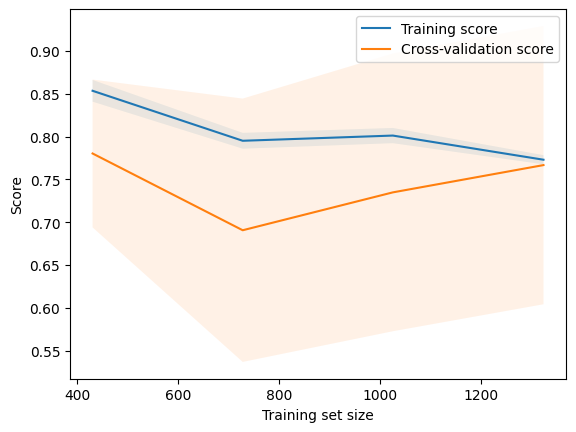

In [248]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train_res, y_train_res) #train classifier

evaluate(lr, X_test, y_test)

bbc3 = BalancedBaggingClassifier(estimator=lr,
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=7)
 
#Train the classifier.
model_his=bbc3.fit(X_train_res, y_train_res)
evaluate(lr,X_test,y_test)
print_graphics(bbc3)

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Cross-validation score means:  0.9003968253968253
Accuracy:  0.7564575645756457
              precision    recall  f1-score   support

           0       0.98      0.74      0.84       236
           1       0.33      0.89      0.48        35

    accuracy                           0.76       271
   macro avg       0.66      0.81      0.66       271
weighted avg       0.89      0.76      0.79       271



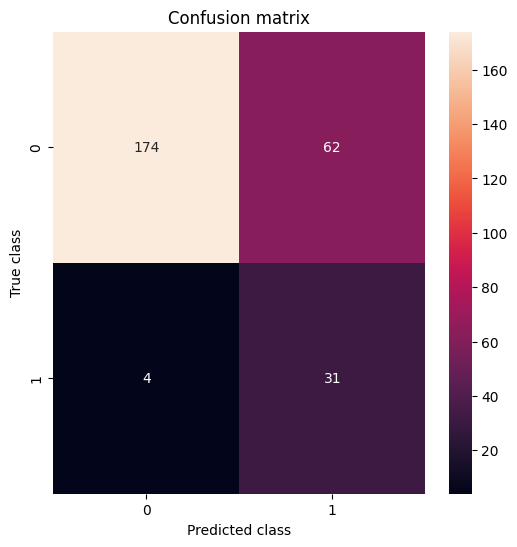

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but BalancedBaggingClassifier was fitted with feature names
  warnings.warn(


Cross-validation score means:  0.3825396825396825
Accuracy:  0.8782287822878229
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       236
           1       0.58      0.20      0.30        35

    accuracy                           0.88       271
   macro avg       0.74      0.59      0.62       271
weighted avg       0.85      0.88      0.85       271



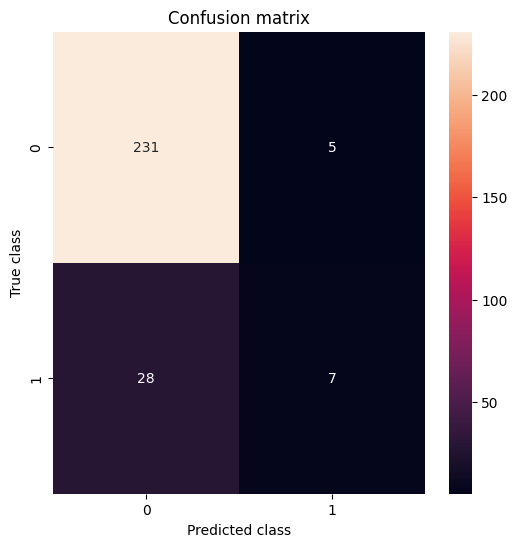

[learning_curve] Training set sizes: [ 132  430  728 1026 1325]
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END ...................

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    4.6s finished


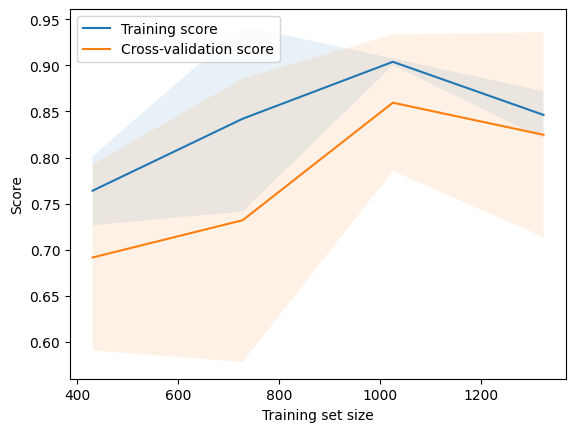

In [249]:
nb = GaussianNB()
nb.fit(X_train_res, y_train_res) #train classifier

evaluate(C, X_test, y_test)

bbc4 = BalancedBaggingClassifier(estimator=nb,
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=7)
 
#Train the classifier.
model_his=bbc4.fit(X_train_res, y_train_res)
evaluate(bbc4,X_test,y_test)
print_graphics(bbc4)

In [285]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score
def train_with_cv(clf,X_train,y_train, cv=StratifiedKFold):
    sgk = cv(n_splits=5, shuffle=True, random_state=40)

    fold = 0
    aucs = []
    accs=[]
    recs=[]
    pca=PCA(int(df_normalized.shape[1]/2))
    pca.fit_transform(X_train,y_train)
    GROUPS = "edad"
    groups = pd.cut(df_normalized[GROUPS], bins=5, labels=False)
    for train_idx, val_idx in sgk.split(X, y, groups):
        X_train = X.loc[train_idx]
        y_train = y.loc[train_idx]

        X_val = X.loc[val_idx]
        y_val = y.loc[val_idx]

        # Fit Model on Train
        auc_score=None
        acc_score=None
        rec_score=None
        clf.fit(X_train, y_train)
        pred = clf.predict_proba(X_val)[:,1]
        y_pred=clf.predict(X_val)
        try:
            auc_score = roc_auc_score(y_val, pred)
            acc_score = accuracy_score(y_val,y_pred)
            rec_score=recall_score(y_val,y_pred)
        except ValueError:
            pass
        if auc_score is not None:
            print(f"======= Fold {fold} ========")
            print(
                f"El AUC en el conjunto de validación es {auc_score:0.4f}"
            )
        if acc_score is not None:
            print(
            f"El Accuracy en el conjunto de validación es {acc_score:0.4f}"
        )
        if rec_score is not None:
            print(
            f"El Recall en el conjunto de validación es {rec_score:0.4f}"
        )    
        fold += 1
        aucs.append(auc_score)
        accs.append(acc_score)
        recs.append(rec_score)
    oof_auc = np.mean(aucs)
    oof_acc=np.mean(accs)
    oof_rec=np.mean(recs)
    print(f'El resultado AUC promediado es {oof_auc:0.4f}')
    print(f'El resultado ACCURACY promediado es {oof_acc:0.4f}')
    print(f'El resultado RECALL promediado es {oof_rec:0.4f}')

======= Fold 0 ========
El AUC en el conjunto de validación es 0.8261
El Accuracy en el conjunto de validación es 0.8893
El Recall en el conjunto de validación es 0.2143
======= Fold 1 ========
El AUC en el conjunto de validación es 0.9336
El Accuracy en el conjunto de validación es 0.9188
El Recall en el conjunto de validación es 0.3571
======= Fold 2 ========
El AUC en el conjunto de validación es 0.9296
El Accuracy en el conjunto de validación es 0.9188
El Recall en el conjunto de validación es 0.4286
======= Fold 3 ========
El AUC en el conjunto de validación es 0.8857
El Accuracy en el conjunto de validación es 0.9074
El Recall en el conjunto de validación es 0.2593
======= Fold 4 ========
El AUC en el conjunto de validación es 0.8744
El Accuracy en el conjunto de validación es 0.9111
El Recall en el conjunto de validación es 0.3704
El resultado AUC promediado es 0.8899
El resultado ACCURACY promediado es 0.9091
El resultado RECALL promediado es 0.3259


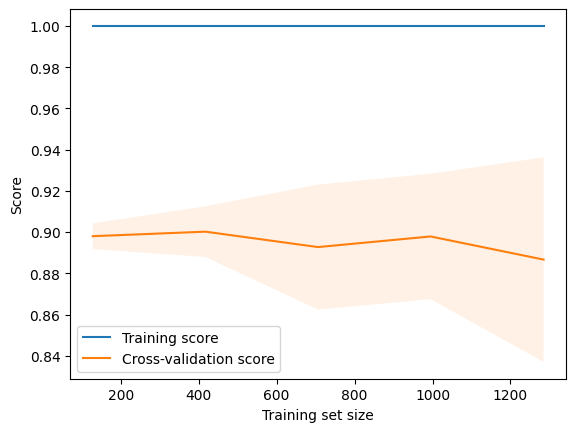

In [275]:
from sklearn.ensemble import HistGradientBoostingClassifier

clf2 = HistGradientBoostingClassifier()
train_with_cv(clf2,X_train_res,y_train_res)
print_graphics(clf2)

======= Fold 0 ========
El AUC en el conjunto de validación es 0.7637
El Accuracy en el conjunto de validación es 0.7269
El Recall en el conjunto de validación es 0.6071
======= Fold 1 ========
El AUC en el conjunto de validación es 0.9043
El Accuracy en el conjunto de validación es 0.7970
El Recall en el conjunto de validación es 0.8929
======= Fold 2 ========
El AUC en el conjunto de validación es 0.8294
El Accuracy en el conjunto de validación es 0.7380
El Recall en el conjunto de validación es 0.7500
======= Fold 3 ========
El AUC en el conjunto de validación es 0.8493
El Accuracy en el conjunto de validación es 0.7667
El Recall en el conjunto de validación es 0.7407
======= Fold 4 ========
El AUC en el conjunto de validación es 0.8070
El Accuracy en el conjunto de validación es 0.7704
El Recall en el conjunto de validación es 0.7407
El resultado AUC promediado es 0.8307
El resultado ACCURACY promediado es 0.7598
El resultado RECALL promediado es 0.7463


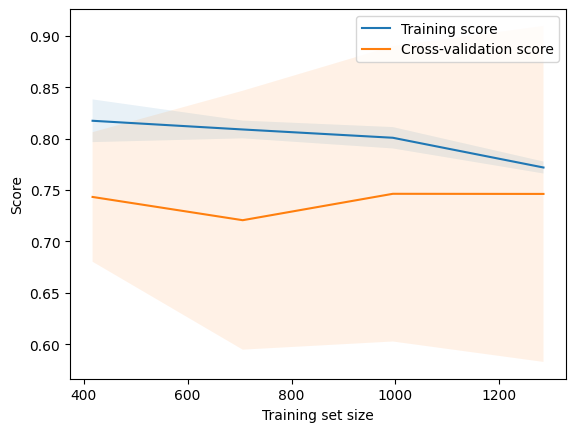

In [286]:
train_with_cv(bbc3,X_train_res,y_train_res)
print_graphics(bbc3)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
from imblearn.combine import SMOTETomek
os_us = SMOTETomek(sampling_strategy=0.8)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=8) # 80% training and 20% test
X_train_res, y_train_res = os_us.fit_resample(X_train, y_train)
X_train=ss.fit_transform(X_train_res)
X_test=ss.fit_transform(X_test)

from tensorflow import convert_to_tensor as ct
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Dense,Dropout

#Creating a pipeline
model = Sequential()

#1st hidden layer with input layer
model.add(Dense(units=28,activation="relu",input_dim=28))

model.add(Dropout(0.3))

#2nd hidden layer
model.add(Dense(units=16,activation="relu",))


model.add(Dropout(0.5))

#3rd hidden layer
model.add(Dense(units=6,activation="relu",))




#output layer
model.add(Dense(units=1,activation="sigmoid"))

model.summary()
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model_his=model.fit(X_train,y_train_res,validation_split=0.20, batch_size=30,epochs=60,verbose=1)


y_pred=model.predict(X_test)
y_pred = (y_pred > 0.45)
print(classification_report(y_test,y_pred,zero_division=0))

ploting(model_his)